In [1]:
import numpy as np
from matplotlib import pyplot as plt
import datetime
import ooi_data_processing_library as ooipy

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [32]:
# Initialize Class Instance

start_time = datetime.datetime(2019,2,1,0,0,0) # time of first sample
end_time = datetime.datetime(2019,2,1,0,0,10) # time of last sample
'''
ooi1 = ooipy.OOIHydrophoneData(starttime=start_time, endtime=end_time, node='/PC01A', limit_seed_files=False, print_exceptions=True)
print('Data from First Attempt:')
if ooi1.data != None:
    print(ooi1.data.data)
else:
    print('No Data Collected\n\n')
'''
ooi2 = ooipy.OOIHydrophoneData(limit_seed_files=False, print_exceptions=True)
ooi2.get_acoustic_data_mp(start_time, end_time, node='/PC01A')
print('Data from Second Attempt:')
print(ooi2.data.data)

Data from Second Attempt:
[ 29492.  30611.  29712. ...,  22431.  24118.  24493.]


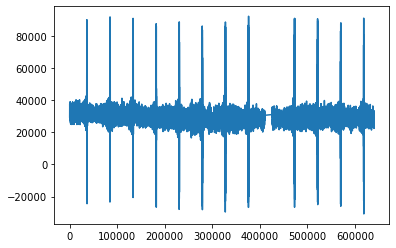

In [22]:
plt.plot(ooi1.data.data)

In [2]:
# debug get_acoustic_data_mp function 
start_time = datetime.datetime(2019,2,1,0,0,0) # time of first sample
end_time = datetime.datetime(2019,2,1,0,0,10) # time of last sample

ooi2 = ooipy.OOIHydrophoneData(limit_seed_files=False, print_exceptions=True)
ooi2.get_acoustic_data_mp(start_time, end_time, node='/PC01A', n_process=2, fmin=20, fmax=30000)
print('Data from Second Attempt:')
print(ooi2.data.data)

Data from Second Attempt:
[ 17547.35672293  36026.88175968  27178.51617104 ...,   -472.25656581
  -1405.25730519   1019.50449272]


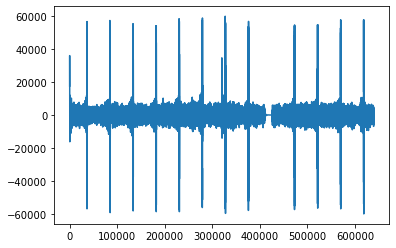

In [3]:
plt.plot(ooi2.data.data)

In [2]:
# debug get_acoustic_data_mp function 
start_time = datetime.datetime(2019,2,3,3,0,0) # time of first sample
end_time = datetime.datetime(2019,2,3,3,0,10) # time of last sample

ooi = ooipy.OOIHydrophoneData(limit_seed_files=False, print_exceptions=True)
ooi.get_acoustic_data_mp(start_time, end_time, node='/PC01A', fmin=20, fmax=30000)
print('Data from Second Attempt:')
print(ooi.data)

Data from Second Attempt:
OO.HYVM2..YDH | 2019-02-03T03:00:00.098000Z - 2019-02-03T03:00:10.000000Z | 64000.0 Hz, 633729 samples


In [6]:
data_url_list = ooi._web_crawler_noise('/2019/02/03/')

In [25]:
from obspy.core import UTCDateTime
utc_time_url_start = UTCDateTime(data_url_list[4701].split('YDH')[1][1:].split('.mseed')[0])
utc_time_url_stop = UTCDateTime(data_url_list[4702].split('YDH')[1][1:].split('.mseed')[0])
if (utc_time_url_start >= ooi.starttime and utc_time_url_start < ooi.endtime) or \
    (utc_time_url_stop >= ooi.starttime and utc_time_url_stop < ooi.endtime) or  \
    (utc_time_url_start <= ooi.starttime and utc_time_url_stop >= ooi.endtime):
    print('bla')

bla


In [26]:
start_time = datetime.datetime(2019,2,3,3,0,0) # time of first sample
end_time = datetime.datetime(2019,2,3,3,0,0,98000) # time of last sample

ooi = ooipy.OOIHydrophoneData(limit_seed_files=False, print_exceptions=True)
ooi.get_acoustic_data(start_time, end_time, node='/PC01A', fmin=20, fmax=30000)
print('Data from Second Attempt:')
print(ooi.data)

No data available for selected time frame.
Data from Second Attempt:
None


C:\Users\fschwock\AppData\Local\Continuum\anaconda3\envs\obspy\lib\site-packages\obspy\core\utcdatetime.py:1271: ObsPyDeprecationWarning: Setting attributes on UTCDateTime instances will raise an Exception in a future version of Obspy.
  warnings.warn(msg, ObsPyDeprecationWarning)


In [31]:
from obspy import read,Stream, Trace
st = read(data_url_list[4701], apply_calib=True)

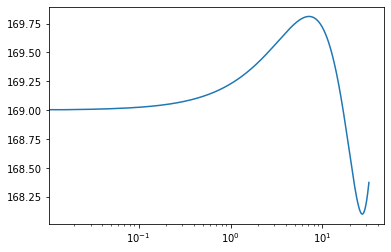

In [35]:
corr = ooi._freq_dependent_sensitivity_correct(2049)
plt.semilogx(np.linspace(0, 32, 2049), corr)